In [ ]:
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [ ]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [ ]:
startsWithDateAndTime('7/26/18, 22:51 - Bobby: This message was deleted')

True

In [ ]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [ ]:
def getDataPoint(line):
    splitLine = line.split(' - ')
    dateTime = splitLine[0]
    date, time = dateTime.split(', ')
    message = ' '.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage = message.split(': ')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [ ]:
from google.colab import files
uploaded = files.upload()
data = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = 'whatsapp-chat-data.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if startsWithDateAndTime(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])  # Change parsedData to data here
            messageBuffer.clear()
            date, time, author, message = getDataPoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)


Saving whatsapp-chat-data.txt to whatsapp-chat-data (6).txt


In [ ]:
df = pd.DataFrame(data, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

<ipython-input-53-8dbae0e31db6>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


,Date,Time,Author,Message
13633,2020-10-02,1:27 am,+91 73032 50500,<Media omitted>
13634,2020-10-02,1:46 am,"Darshan Rander (TSEC, IT)",Lucky u
13635,2020-10-02,1:47 am,+91 73032 50500,Darshan brooo
13636,2020-10-02,1:47 am,+91 73032 50500,Yeh kar na dost
13637,2020-10-02,1:47 am,+91 73032 50500,..
13638,2020-10-02,1:47 am,+91 73032 50500,..
13639,2020-10-02,1:47 am,+91 73032 50500,Mil jayegaa
13640,2020-10-02,1:47 am,"Darshan Rander (TSEC, IT)",Okk mene pehle kiya tha firse?
13641,2020-10-02,1:49 am,"Shubham Chettiar (TSEC CS, TE)","Yeah, many people tried this in the morning an..."
13642,2020-10-02,1:49 am,"Darshan Rander (TSEC, IT)",Okk firse karte hai...hope so mil jaye


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13653 entries, 0 to 13652
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     13653 non-null  datetime64[ns]
 1   Time     13653 non-null  object        
 2   Author   12576 non-null  object        
 3   Message  13653 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 426.8+ KB


In [ ]:
df.Author.unique()

array([None, '+91 96536 93868', 'Dheeraj Lalwani (TSEC, CS)',
       '+91 99201 75875', '+91 95949 08570', '+91 79778 76844',
       '+91 90499 38860', 'Tanay Kamath (TSEC, CS)', 'Saket (TSEC, CS)',
       '+91 77568 95072', 'Rohit Pathak (TSEC, CS)', '+91 75078 05454',
       'Darshan Rander (TSEC, IT)', '+91 79774 68083', '+91 70394 60876',
       '+91 96191 55044', '+91 90678 93300', 'Mohit Varma (TSEC, CS)',
       '+91 79770 56210', 'Chirag Sharma (TSEC, CS)',
       'Vivek Iyer (TSEC, Biomed)', 'Tushar Nankani', '+91 81696 22410',
       '+91 89764 07509', '+91 78758 66747', 'Ankit (TSEC, CS)',
       '+91 86556 33169', '+91 76663 28147', '+91 88284 70904',
       '+91 97698 67348', 'Vivek (TSEC, CS)', 'Hardik Raheja (TSEC, CS)',
       '+91 91680 38866', 'Mittul Dasani (TSEC, CS)',
       'Kartik Soneji (TSEC, CS)', '+91 77180 43697', '+91 99676 84479',
       'Shreya (TSEC, IT)', '+91 96190 16721', '+91 89833 85127',
       '+91 99675 58551', '+91 90822 59476', 'Prithvi Rohira 

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12576 entries, 112 to 13652
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     12576 non-null  datetime64[ns]
 1   Time     12576 non-null  object        
 2   Author   12576 non-null  object        
 3   Message  12576 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 491.2+ KB


In [ ]:
total_messages = df.shape[0]
print(total_messages)

12576


In [ ]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

687


In [ ]:
import emoji

In [ ]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(emoji.is_emoji(char) for char in word):
            emoji_list.append(word)
    return emoji_list

df["emoji"] = df["Message"].apply(split_count)

In [ ]:
emojis = sum(df['emoji'].str.len())
print(emojis)

4504


In [ ]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [ ]:
links = np.sum(df.urlcount)

In [ ]:
print("Data science Community")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Data science Community
Messages: 12576
Media: 687
Emojis: 4504
Links: 279


In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']

In [ ]:
messages_df = df.drop(media_messages_df.index)

In [ ]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11889 entries, 113 to 13652
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11889 non-null  datetime64[ns]
 1   Time      11889 non-null  object        
 2   Author    11889 non-null  object        
 3   Message   11889 non-null  object        
 4   emoji     11889 non-null  object        
 5   urlcount  11889 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 650.2+ KB


In [ ]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [ ]:
messages_df.tail(20)

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
13632,2020-10-02,1:25 am,"Tanay Kamath (TSEC, CS)",I got the GCP wale credits but didn't get any ...,[],0,68,13,1
13634,2020-10-02,1:46 am,"Darshan Rander (TSEC, IT)",Lucky u,[],0,7,2,1
13635,2020-10-02,1:47 am,+91 73032 50500,Darshan brooo,[],0,13,2,1
13636,2020-10-02,1:47 am,+91 73032 50500,Yeh kar na dost,[],0,15,4,1
13637,2020-10-02,1:47 am,+91 73032 50500,..,[],0,2,1,1
13638,2020-10-02,1:47 am,+91 73032 50500,..,[],0,2,1,1
13639,2020-10-02,1:47 am,+91 73032 50500,Mil jayegaa,[],0,11,2,1
13640,2020-10-02,1:47 am,"Darshan Rander (TSEC, IT)",Okk mene pehle kiya tha firse?,[],0,30,6,1
13641,2020-10-02,1:49 am,"Shubham Chettiar (TSEC CS, TE)","Yeah, many people tried this in the morning an...",[],0,149,28,1
13642,2020-10-02,1:49 am,"Darshan Rander (TSEC, IT)",Okk firse karte hai...hope so mil jaye,[],0,38,7,1


In [ ]:
l = ["Aman Kharwal", "Sahil Pansare", "Sumehar"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])
  print('Links Sent', links)
  print()


Stats of Aman Kharwal -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of Sahil Pansare -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of Sumehar -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0



<ipython-input-73-036fef6d4e7c>:10: RuntimeWarning: invalid value encountered in scalar divide
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
<ipython-input-73-036fef6d4e7c>:10: RuntimeWarning: invalid value encountered in scalar divide
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
<ipython-input-73-036fef6d4e7c>:10: RuntimeWarning: invalid value encountered in scalar divide
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]


In [ ]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

273


In [ ]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

('😂', 1880)
('👍', 259)
('🔥', 253)
('😅', 223)
('💯', 183)
('🤣', 128)
('👍🏻', 99)
('🤦\u200d♂️', 82)
('👏', 72)
('🙏', 62)
('🙌🏻', 51)
('😭', 48)
('🤔', 37)
('🤩', 32)
('👌', 29)
('❤️', 29)
('🙄', 28)
('👏🏻', 26)
('🤦\u200d♂', 25)
('✨', 23)
('👌🏻', 22)
('🙌', 21)
('😢', 21)
('🙈', 21)
('🤦🏻\u200d♂️', 21)
('🤯', 18)
('😍', 17)
('😁', 16)
('👌🏼', 16)
('🥳', 15)
('🙏🏻', 14)
('🤷🏻\u200d♂️', 14)
('🙁', 12)
('✅', 11)
('🥺', 11)
('😎', 11)
('✌️', 11)
('😓', 11)
('⚒', 11)
('🎉', 10)
('💻', 10)
('🙃', 10)
('🤷\u200d♂️', 10)
('👉🏾', 10)
('🔸', 9)
('💪🏻', 9)
('⚡️', 9)
('👨🏻\u200d💻', 8)
('😶', 8)
('💪', 8)
('🤞', 8)
('👉🏻', 8)
('😤', 8)
('😊', 7)
('👩🏻\u200d💻', 7)
('⚡', 7)
('👍🏼', 7)
('✌', 6)
('☝', 6)
('📍', 6)
('🏁', 6)
('❤', 6)
('🎂', 6)
('😡', 6)
('🟢', 6)
('👨\u200d💻', 6)
('🙌🏼', 6)
('▪️', 6)
('👉', 6)
('🤨', 5)
('📌', 5)
('⏳', 5)
('😋', 5)
('🗓', 5)
('🔊', 5)
('🔴', 5)
('👀', 5)
('🙂', 5)
('😱', 5)
('💛', 5)
('😳', 5)
('🛑', 5)
('🤟', 4)
('😄', 4)
('😇', 4)
('🏆', 4)
('👇🏻', 4)
('🔶', 4)
('😌', 4)
('😃', 4)
('🥴', 4)
('😉', 4)
('🤞🏻', 4)
('🤮', 4)
('😕', 4)
('🤗', 4)
('⁉️

In [ ]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,😂,1880
1,👍,259
2,🔥,253
3,😅,223
4,💯,183
...,...,...
268,📅,1
269,🕜,1
270,✍,1
271,▶,1


In [ ]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

There are 507930 words in all the messages.


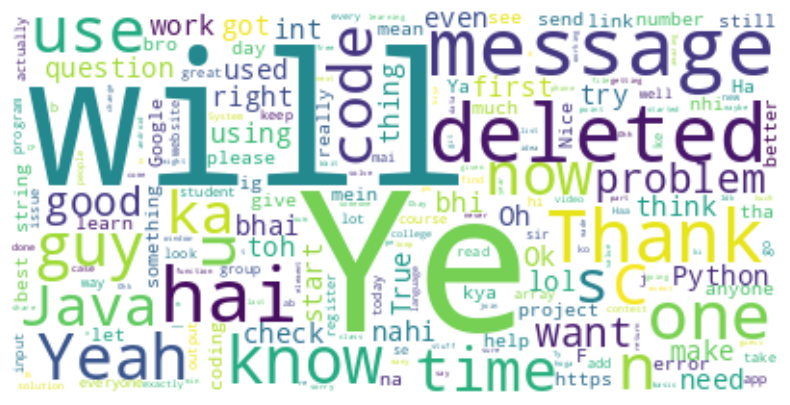

In [ ]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
l = ["Aman Kharwal", "Sahil Pansare", "Sumehar"]
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    if text:
        stopwords = set(STOPWORDS)
        # Generate a word cloud image
        print('Author name', l[i])
        wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
        # Display the generated image
        plt.figure(figsize=(10,5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print('No messages found for Author:', l[i])

No messages found for Author: Aman Kharwal
No messages found for Author: Sahil Pansare
No messages found for Author: Sumehar
